In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Old

In [2]:
# Arms = [np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7),
#         np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7),
#         np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7),
#         np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7)]

# n = 100
# k = 4*4
# delta = 0.1
# X = np.zeros(n)
# T = np.zeros(k)
# arms_mat = np.zeros((n,k))
# mu = np.zeros(k)

# A = np.zeros(n, dtype = int)
# for t in range(n):
#     all_A_t = np.zeros(k)
#     for i in range(k):
#         all_A_t[i] = UCB(i, delta)
#     A[t] = np.argmax(all_A_t)
# #     print(T[A[t]])
#     X[t] = Arms[int(A[t])]
#     T[A[t]] += 1
#     arms_mat[t, A[t]] = X[t]
#     mu[A[t]] = 1/T[A[t]] * sum(arms_mat[:, A[t]])
    
# plt.plot(X)

## Actual

* Formule du regret

$$
R_n = n \mu^{*} -  \mathbf{E}\left[\sum_t X_t \right] = n \mu^{*} - \sum \mu_t = n \mu^{*} - < T| \mu >
$$

Avec $\mu_t$ la moyenne de la distribution d'où est tirée $X_t$

In [3]:
def UCB(i, delta, mu, T):
    if T[i] == 0:
        return 1000000000000
    else:
        return mu[i] + np.sqrt(2 * np.log(1/delta)/T[i])

In [4]:
def UCB_tot(n, delta, k, means, std):
    X = np.zeros(n) ##Réalisations (X_t)_t
    T = np.zeros(k) ##T[i] = nb de fois où i a été tiré
    arms_mat = np.zeros((n,k))
    mu = np.zeros(k) ##mu[i] = moyenne empirique de i

    A = np.zeros(n, dtype = int)
    
    ##Compute Rn at each iteration
    Rn = np.zeros(n)
    mu_star = np.max(means)
    for t in range(n):
        all_A_t = np.zeros(k)
        for i in range(k):
            all_A_t[i] = UCB(i, delta, mu, T) ##On calcul UCB_i pour tous les bras
        A[t] = np.argmax(all_A_t) ##On prend le bras qui a le UCB_i le plus haut
        X[t] = launch_arm(A[t]) ##On génère X_t la réalisation à partir du bras choisi
        T[A[t]] += 1 ##Le bras i a été tiré une fois de plus
        arms_mat[t, A[t]] = X[t] ##On stock la valeur de la réalisation dans une matrice
        mu[A[t]] = 1/T[A[t]] * sum(arms_mat[:, A[t]]) ##On update la moyenne empirique
        Rn[t] = (t+1)*mu_star - T@mu ##On calcul le regret à l'instant t
    return X, Rn, A, mu


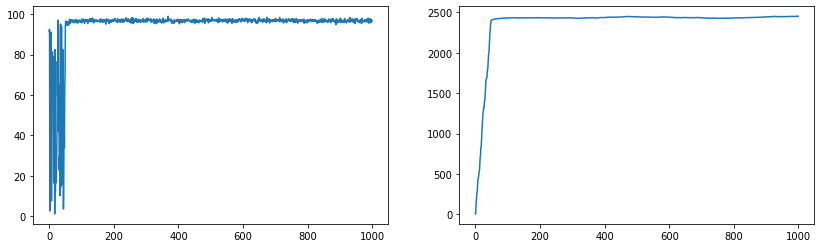

In [7]:
n = 1000
delta = 1/(n**2)

#Total number of arms
k = 50

means = [100*np.random.rand() for i in range(k)]
std = [5*np.random.rand() for i in range(k)]

#Return reward of arm i
def launch_arm(i):
    ## La distribution doit être 1 sub-ussian
    return np.random.normal(means[i],std[i])

#on calcule la moyenne des résultats sur max_ite tentatives
max_ite = 10
X_t_mean = np.zeros((max_ite,n))
Rn_mean = np.zeros((max_ite,n))
for ite in range(max_ite):
    X_t, Rn, arms, mu= UCB_tot(n, delta, k, means, std)
    X_t_mean[ite] = X_t
    Rn_mean[ite] = Rn

plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.plot(np.sum(X_t_mean,axis=0)/max_ite)
plt.subplot(1,2,2)
plt.plot(np.sum(Rn_mean,axis=0)/max_ite)


**Bras choisis**

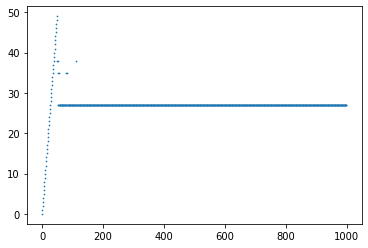

In [8]:
plt.scatter(range(n),arms,s=0.5)

## LinearUCB

### Decomp

In [57]:
import numpy as np
import pandas as pd
# from scipy.linalg import clarkson_woodruff_transform
from scipy.sparse.linalg import svds
from sklearn.decomposition import NMF

In [194]:
films = {0:"action", 1:"comedy", 2:"action", 3:"thriller", 4:"love-story"}

arthur = np.array([4.,3.,1.,5.,1.]).reshape((1,5))
boris = np.array([2.,2.,5.,2.,5.]).reshape((1,5))
chloe = np.array([1.,4.,1.,2.,5.]).reshape((1,5))
dylan = np.array([4.,4.,1.,4.,3.]).reshape((1,5))
# eva = np.array([2,5,3,2,4]).reshape((1,5))

# arthur = np.array([1.,1.,0.,1.,0.]).reshape((1,5))
# boris = np.array([1.,0.,1.,1.,0.]).reshape((1,5))
# chloe = np.array([0.,1.,0.,0.,1.]).reshape((1,5))
# dylan = np.array([1.,1.,0.,1.,1.]).reshape((1,5))


D = np.concatenate([arthur, boris, chloe, dylan], axis = 0)

d = 2 ## Quand d augmente, plus dépendant du contexte
U, s, Vt = svds(D, k = d)
s=np.diag(s)
U = np.dot(U,s)

model = NMF(n_components=d, init='random', random_state=0)
W = model.fit_transform(D)
H = model.components_

In [204]:
[np.linalg.norm(H[:,i]) for i in range(5)]

[1.5493650557067213,
 1.9112632851546845,
 1.9888713991194762,
 1.807552480240475,
 3.0078112186293624]

In [196]:
Vt

array([[-0.41209123, -0.12078026,  0.48758689, -0.47050284,  0.59705866],
       [-0.41462374, -0.48269678, -0.30052284, -0.4841798 , -0.51994895]])

In [201]:
nb_users = 4 ##nb users
nb_bras = 5 ##nb films
delta = 1/(100**2)

alpha =  1 + np.sqrt(np.log(2/delta)/2)

# d = 1 ##dimension


A_tot = np.zeros(nb_users)
b_tot = np.zeros(nb_users)
theta_tot = np.zeros(nb_users)
a = np.zeros(nb_users)

nb_tirage = np.zeros(nb_bras)

# liste_X_t = ##
T = 1000 ## nb iterations

r = dylan.T ## choix du user

x_t = H.T

A = [np.eye(d) for i in range(nb_bras)]
b = [np.zeros((d,1)) for i in range(nb_bras)]
theta = [np.linalg.inv(A[a])@b[a] for a in range(nb_bras)]
p = [(theta[a].T)@x_t[a] for a in range(nb_bras)]

for t in range(T):
    for a in range(nb_bras):
        theta[a] = np.linalg.inv(A[a])@b[a]
        p[a] = (theta[a].T)@x_t[a] + alpha*np.sqrt(((x_t[a].T)@np.linalg.inv(A[a]))@x_t[a])
    a_t = np.argmax(p)
    A[a_t] = (A[a_t] + x_t[a_t]@(x_t[a_t].T)).reshape((d,d))
#     print(b[a_t] + r[a_t]*x_t[a_t])
    b[a_t] = b[a_t] + r[a_t]*(x_t[a_t]).reshape((d,1))
    print(a_t)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
